# One sample test on simulated bulk RNA-seq

Nuha BinTayyash, 2020

This notebook shows how to run GPcounts with one sample test  and the resulted ROC curves on simulated bulk RNA-seq datasets.

In [2]:
import numpy as np
import pandas as pd
from GPcounts.GPcounts_Module import Fit_GPcounts
import gpflow
from helper import plot 

In [3]:
files = [
    '../data/low_counts_low_dispersion_0.csv'
    ,'../data/low_counts_high_dispersion_0.csv'                                     
    ,'../data/high_counts_low_dispersion_0.csv'
    ,'../data/high_counts_high_dispersion_0.csv'
    ]
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])
    likelihoods = ['Negative_binomial','Gaussian','Poisson'] 
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+"_"+file)
    

  0%|          | 0/600 [00:00<?, ?it/s]

../data/low_counts_low_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/low_counts_high_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/high_counts_low_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/high_counts_high_dispersion_0.csv


100%|██████████| 600/600 [34:31<00:00,  3.45s/it]  


To do Anscombe_transformation, run /Analysis/Theory/Anscombe transformation.ipynb notebook from [SpatialDE](https://github.com/Teichlab/SpatialDE) package

In [4]:
files = [
    '../data/Anscombe_transformation_low_counts_low_dispersion_0.csv',
    '../data/Anscombe_transformation_low_counts_high_dispersion_0.csv',                                     
    '../data/Anscombe_transformation_high_counts_low_dispersion_0.csv',
    '../data/Anscombe_transformation_high_counts_high_dispersion_0.csv'
    ]
                     
X = pd.read_csv('../data/time_points.csv',index_col=[0])

for file in files:
    print(file)
    Y = pd.read_csv(file,index_col=[0])    
    
    likelihoods = ['Gaussian']
    for likelihood in likelihoods:
        gp_counts = Fit_GPcounts(X,Y,safe_mode = True) 
        results = gp_counts.One_sample_test(likelihood,transform = False)
        file = file.replace("../data/", "")
        results.to_csv("../data/ll_ratio_"+likelihood+'_'+file)
       

  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_low_counts_low_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_low_counts_high_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_high_counts_low_dispersion_0.csv


  0%|          | 0/600 [00:00<?, ?it/s]

../data/Anscombe_transformation_high_counts_high_dispersion_0.csv


100%|██████████| 600/600 [05:17<00:00,  1.89it/s]


In [3]:
from matplotlib import pyplot as plt
from sklearn import metrics

\* Note in one sample tesr we set negative log likelihood ratios are to zero

### Roc curves 

low_counts_low_dispersion_0.csv


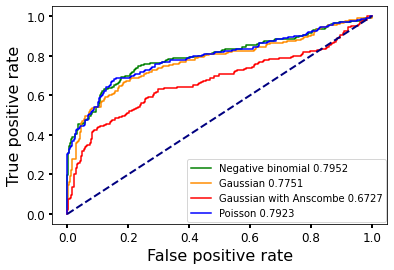

low_counts_high_dispersion_0.csv


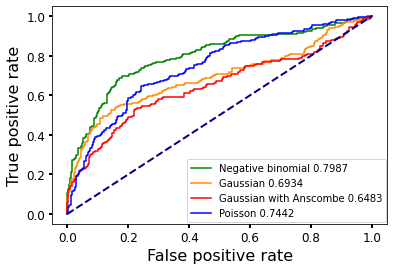

high_counts_low_dispersion_0.csv


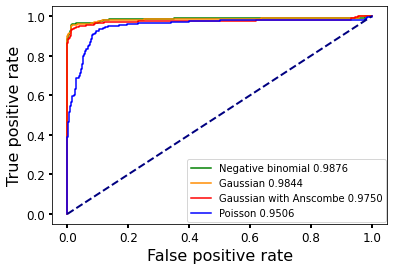

high_counts_high_dispersion_0.csv


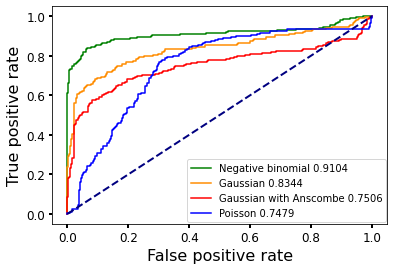

In [4]:
filesname = [
            'low_counts_low_dispersion_0.csv'
            ,'low_counts_high_dispersion_0.csv'                                     
            ,'high_counts_low_dispersion_0.csv'
            ,'high_counts_high_dispersion_0.csv'
            ]
            
for file in filesname:
    print(file)
    
    Gaussian = pd.read_csv('../data/ll_ratio_Gaussian_'+file,index_col=[0])
    Gaussian_anscombe = pd.read_csv('../data/ll_ratio_Gaussian_Anscombe_transformation_'+file,index_col=[0])
    NegativeBinomial = pd.read_csv('../data/ll_ratio_Negative_binomial_'+file,index_col=[0])
    Poisson = pd.read_csv('../data/ll_ratio_Poisson_'+file,index_col=[0])
    
    
    D = NegativeBinomial.shape[0]
    true_label = np.zeros(D)
    
    for j in range(D):
        if j %2 == 0:
            true_label[j] = 1
    
    labels = pd.DataFrame(true_label, index =NegativeBinomial.index.values, columns =['label'])
    NegativeBinomial = pd.concat([NegativeBinomial,labels],axis = 1)
    fig = plt.figure()
    
    plt.tick_params(labelsize='large', width=2)     
    fpr_NB, tpr_NB, thresholds_NB = metrics.roc_curve( NegativeBinomial['label'], NegativeBinomial['log_likelihood_ratio'])
    AUC_NB=metrics.auc(fpr_NB, tpr_NB)
    plt.plot(fpr_NB, tpr_NB,color='green',label='Negative binomial {0:.4f}'.format(AUC_NB))
    
    fpr_G, tpr_G, thresholds_G = metrics.roc_curve(NegativeBinomial['label'],Gaussian['log_likelihood_ratio'])
    AUC_G=metrics.auc(fpr_G, tpr_G)
    plt.plot(fpr_G, tpr_G, color='darkorange', label='Gaussian {0:.4f}'.format(AUC_G))
    
    fpr_G_a, tpr_G_a, thresholds_G_a = metrics.roc_curve(NegativeBinomial['label'],Gaussian_anscombe['log_likelihood_ratio'])
    AUC_G_a=metrics.auc(fpr_G_a, tpr_G_a)
    plt.plot(fpr_G_a, tpr_G_a, color='red', label='Gaussian with Anscombe {0:.4f}'.format(AUC_G_a))
    
    fpr_P, tpr_P, thresholds_P = metrics.roc_curve( NegativeBinomial['label'], Poisson['log_likelihood_ratio'])
    AUC_P=metrics.auc(fpr_P, tpr_P)
    plt.plot(fpr_P, tpr_P,color='blue',label='Poisson {0:.4f}'.format(AUC_P))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    plt.legend(loc='upper center', bbox_to_anchor=(.70, 0.32))
    plt.xlabel('False positive rate', fontsize=16)
    plt.ylabel('True positive rate', fontsize=16)
    plt.show()
    

100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

gene_1_1


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.3676306248023697
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.5569060462015293
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.06290111812557016
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[8.23899774e-02...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.26271997e-01, 0.00000000e+00, 0.00000000e+00..."


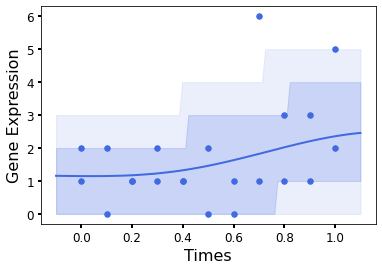

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.2270023084046854
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.14559566642795507
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.30402737e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.66532905e-01, 0.00000000e+00, 0.00000000e+00..."


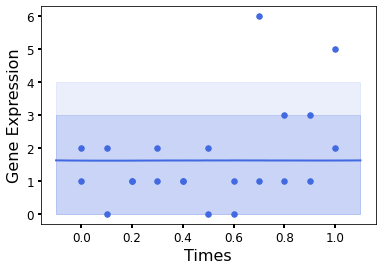

gene_1_2


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.8149139949361212
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.08619444378677277
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.05437939073205197
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.19944600e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[4.18493030e-01, 0.00000000e+00, 0.00000000e+00..."


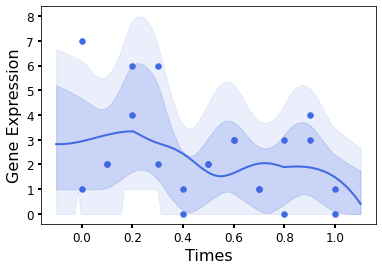

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.7700067660851848
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.2502932553332718
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.80816527e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.94776029e-01, 0.00000000e+00, 0.00000000e+00..."


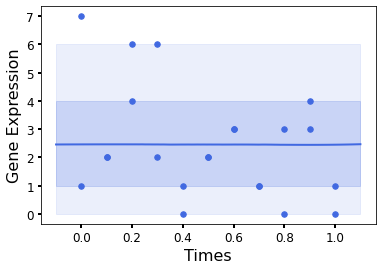

gene_1_3


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.44139336693578796
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.23991418816710305
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,6.150749379867785e-07
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.26535156e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[4.53552265e-01, 0.00000000e+00, 0.00000000e+00..."


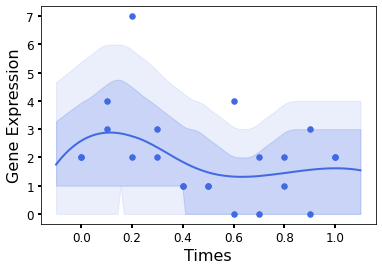

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.47435217171103294
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,6.150944500309812e-07
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.76657840e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.14806612e-01, 0.00000000e+00, 0.00000000e+00..."


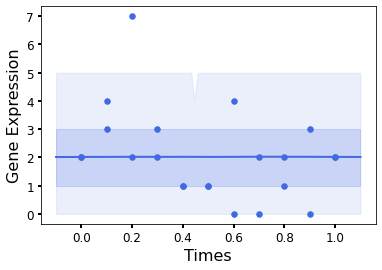

gene_1_4


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.9542728187446079
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.2573299824672553
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.12639940538787425
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.20089895e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.55680525e-01, 0.00000000e+00, 0.00000000e+00..."


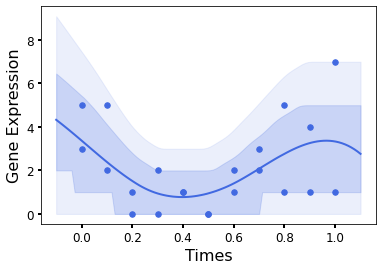

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.5342225975414294
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.40117740727465223
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.64488043e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.64120713e-01, 0.00000000e+00, 0.00000000e+00..."


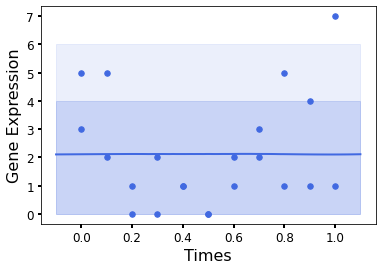

In [7]:
 # plot low_low
file = '../data/low_counts_low_dispersion_0.csv'
   
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])
#gene_1_84
gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

100%|██████████| 4/4 [00:09<00:00,  2.29s/it]

gene_2_1


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.0763423238764798
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.02058862471751745
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.4555281567629166
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[2.45168877e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.91518975e-01, 0.00000000e+00, 0.00000000e+00..."


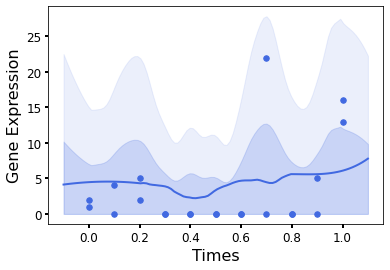

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.2759656774087473
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.612612810963245
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.20917483e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.89660177e-01, 0.00000000e+00, 0.00000000e+00..."


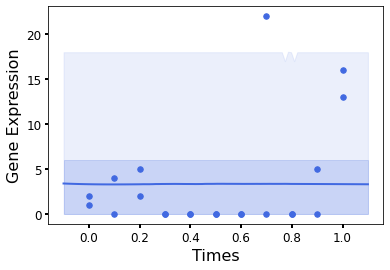

gene_2_2


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,3.0198502542778582
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,3.134414841092738
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.4281179156832398
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.02212032e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.45778144e-01, 0.00000000e+00, 0.00000000e+00..."


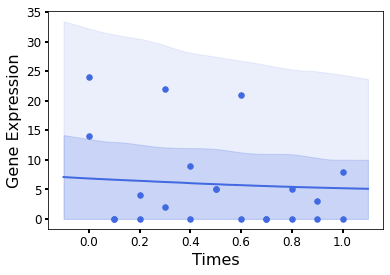

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.996827625341835
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.4787245754539757
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.75180921e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[2.21508300e-01, 0.00000000e+00, 0.00000000e+00..."


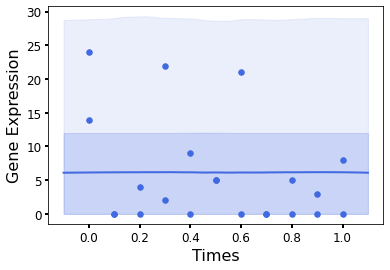

gene_2_3


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.5953335724165241
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.08247362747764532
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.3094477662604405
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[-4.61383264e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[9.30659225e-01, 0.00000000e+00, 0.00000000e+00..."


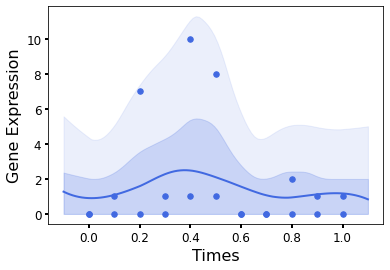

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,7.012517795501481e-07
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.302033974402398
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.09886619e-03...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.00002076e+00, 0.00000000e+00, 0.00000000e+00..."


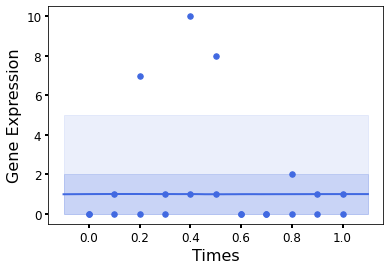

gene_2_4


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.4912076454246894
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.19621803831084064
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.5869199993477419
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[-5.28869755e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[6.87691639e-01, 0.00000000e+00, 0.00000000e+00..."


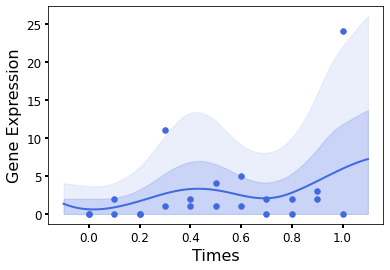

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.9949426602328997
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.211488205113844
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.48994778e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.15272879e-01, 0.00000000e+00, 0.00000000e+00..."


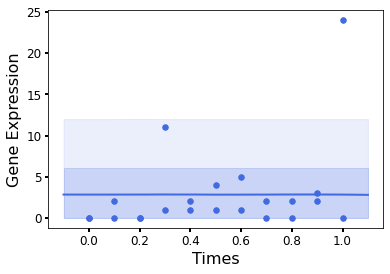

In [8]:
file = '../data/low_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')
plot(params,X.values,Y.iloc[0:4,:])

100%|██████████| 4/4 [00:07<00:00,  2.00s/it]

gene_3_1


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,48.02842799098942
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,7.234277138917981
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.05798756373064331
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.35392730e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.40274158e-02, 0.00000000e+00, 0.00000000e+00..."


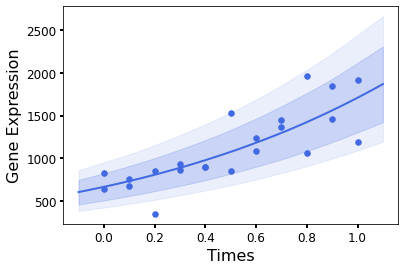

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,48.39627205737331
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.15368375008842655
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.00954826e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.20423852e-02, 0.00000000e+00, 0.00000000e+00..."


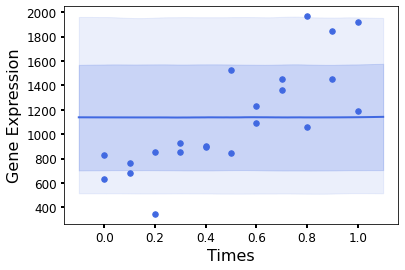

gene_3_2


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,49.691703328239
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,26.99025013214207
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.05655253804845234
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.03472093...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.20764810e-02, 0.00000000e+00, 0.00000000e+00..."


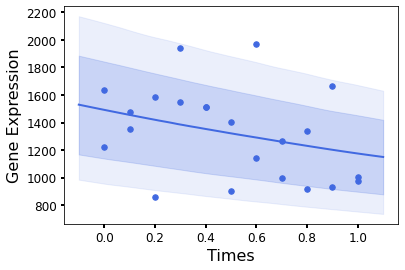

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,51.32082562681595
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.06278020017286837
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.00380330e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[7.50047504e-03, 0.00000000e+00, 0.00000000e+00..."


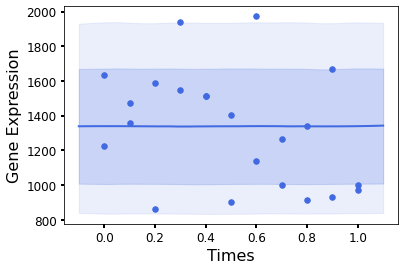

gene_3_3


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,41.29983028809003
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.2468613848456926
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.008285936681227497
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[0.78331288...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.08413516e-02, 0.00000000e+00, 0.00000000e+00..."


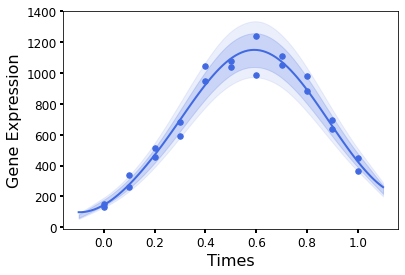

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,41.458998908093555
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.3137998113784213
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.02061633e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.85665510e-02, 0.00000000e+00, 0.00000000e+00..."


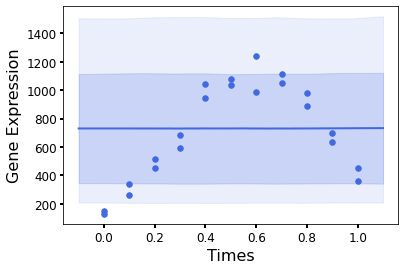

gene_3_4


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,29.41856003627418
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,224.3369766486287
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.011114899094819797
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.20603013e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[-4.89583639e-03, 0.00000000e+00, 0.00000000e+00..."


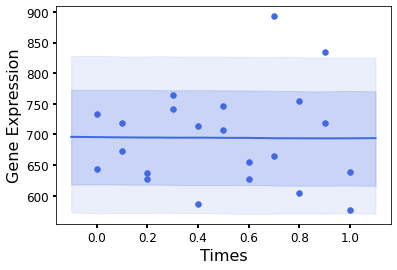

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,42.72993193419317
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.011037819173436499
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.00082541e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[-3.64352844e-03, 0.00000000e+00, 0.00000000e+00..."


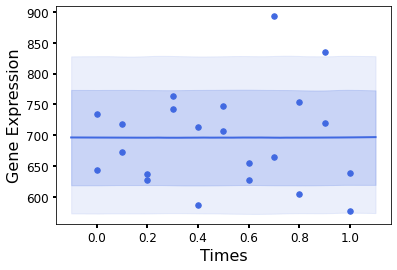

In [9]:
file = '../data/high_counts_low_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.iloc[0:4,:])

100%|██████████| 4/4 [00:09<00:00,  2.31s/it]

gene_4_1


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,56.18180454102865
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.3202423737339646
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.8600224205302909
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[5.14174474e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[6.89851722e-02, 0.00000000e+00, 0.00000000e+00..."


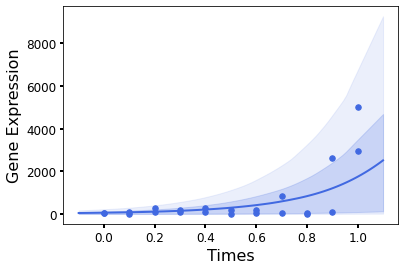

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,41.61757125666479
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,3.005502491729747
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.98363024e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.66253746e-02, 0.00000000e+00, 0.00000000e+00..."


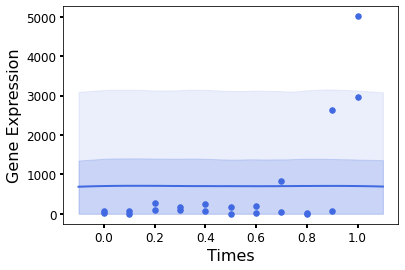

gene_4_2


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,45.93589304951798
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,907.1336583175738
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.6074179956769568
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[9.99061037e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.02816364e-02, 0.00000000e+00, 0.00000000e+00..."


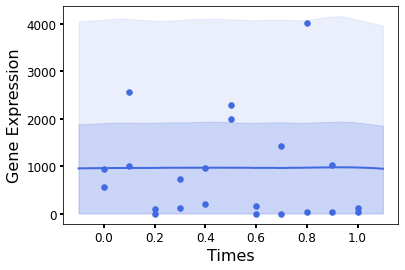

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,33.788765985345215
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,2.606973148595029
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.16367975e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[5.84394989e-02, 0.00000000e+00, 0.00000000e+00..."


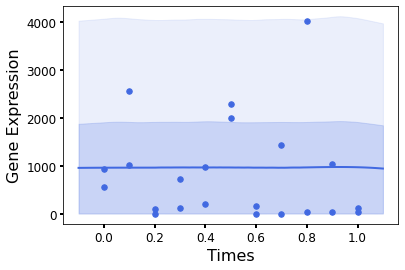

gene_4_3


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,31.641659313474022
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.24106255183459493
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.8957340555289365
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[8.31156946e-01...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[1.38543638e-01, 0.00000000e+00, 0.00000000e+00..."


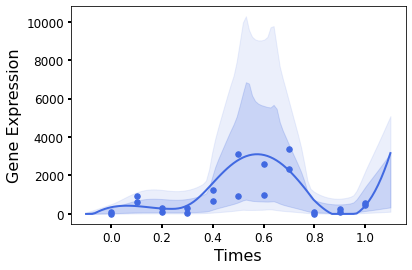

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,36.91181098604722
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.5638270194548316
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.11729534e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[4.35753718e-02, 0.00000000e+00, 0.00000000e+00..."


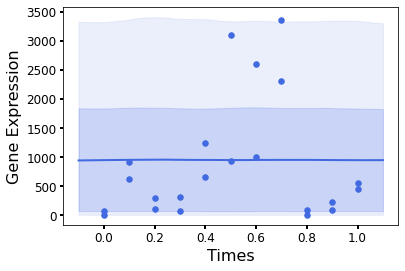

gene_4_4


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,26.667170628324754
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.542110414791662
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.9086625724668104
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.25212585e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[9.74344466e-02, 0.00000000e+00, 0.00000000e+00..."


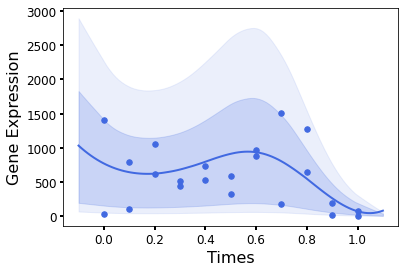

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,35.25507550868694
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.138423989057345
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(22, 1)",float64,[[1.07583891e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 22, 22)",float64,"[[[3.81361323e-02, 0.00000000e+00, 0.00000000e+00..."


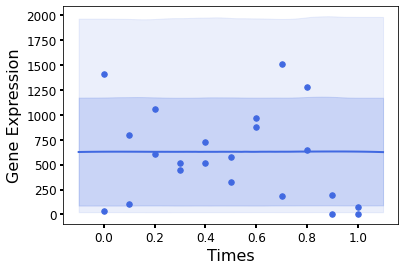

In [10]:
file = '../data/high_counts_high_dispersion_0.csv'
  
X = pd.read_csv('../data/time_points0.csv',index_col=[0])
Y = pd.read_csv(file,index_col=[0])

gp_counts = Fit_GPcounts(X,Y) 
params = gp_counts.load_predict_models(Y.iloc[0:4,:].index.values,'One_sample_test','Negative_binomial')

plot(params,X.values,Y.iloc[0:4,:])